<a href="https://colab.research.google.com/github/VAbhishek12/BrainTumor_Detection/blob/main/BrainTumor/BrainTumourDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PACKAGES AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")

In [ ]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg')]
----------------------------------------------------------------------------------------------------
[WindowsPath('yes/y0.jpg'), WindowsPath('yes/y1.jpg'), WindowsPath('yes/y10.jpg'), WindowsPath('yes/y100.jpg'), WindowsPath('yes/y1000.jpg')]


In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [ ]:
print(Yes_No_List[0:10])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg'), WindowsPath('no/no1001.jpg'), WindowsPath('no/no1002.jpg'), WindowsPath('no/no1003.jpg'), WindowsPath('no/no1004.jpg'), WindowsPath('no/no1005.jpg')]


In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1000
YES COUNTING:  1500


In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0        no\no0.jpg             no
1        no\no1.jpg             no
2       no\no10.jpg             no
3      no\no100.jpg             no
4     no\no1000.jpg             no
...             ...            ...
2494   yes\y994.jpg            yes
2495   yes\y995.jpg            yes
2496   yes\y996.jpg            yes
2497   yes\y997.jpg            yes
2498   yes\y998.jpg            yes

[2499 rows x 2 columns]


# TESTING

In [ ]:
Prediction_Path = Path("pred")

In [ ]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [ ]:
print(Test_JPG_Path[0:5])

[WindowsPath('pred/pred0.jpg'), WindowsPath('pred/pred1.jpg'), WindowsPath('pred/pred10.jpg'), WindowsPath('pred/pred11.jpg'), WindowsPath('pred/pred12.jpg')]


In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

               JPG TUMOR_CATEGORY
0   pred\pred0.jpg           pred
1   pred\pred1.jpg           pred
2  pred\pred10.jpg           pred
3  pred\pred11.jpg           pred
4  pred\pred12.jpg           pred


# SHUFFLING

In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)


In [ ]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      no\no480.jpg             no
1     no\no1382.jpg             no
2     no\no1102.jpg             no
3      yes\y634.jpg            yes
4     yes\y1476.jpg            yes
...             ...            ...
2494   no\no234.jpg             no
2495   no\no125.jpg             no
2496   yes\y426.jpg            yes
2497   yes\y767.jpg            yes
2498   no\no123.jpg             no

[2499 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'no')

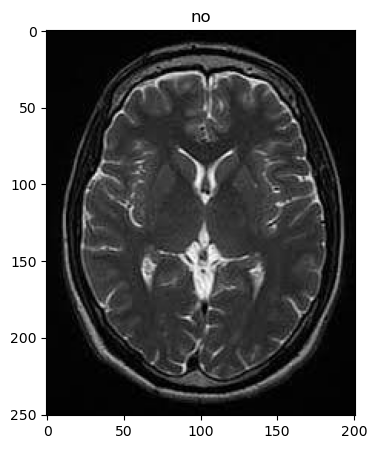

In [ ]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

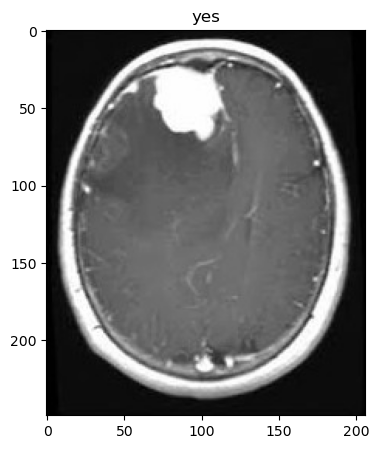

In [ ]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Train_Data["JPG"][1000]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][1000])

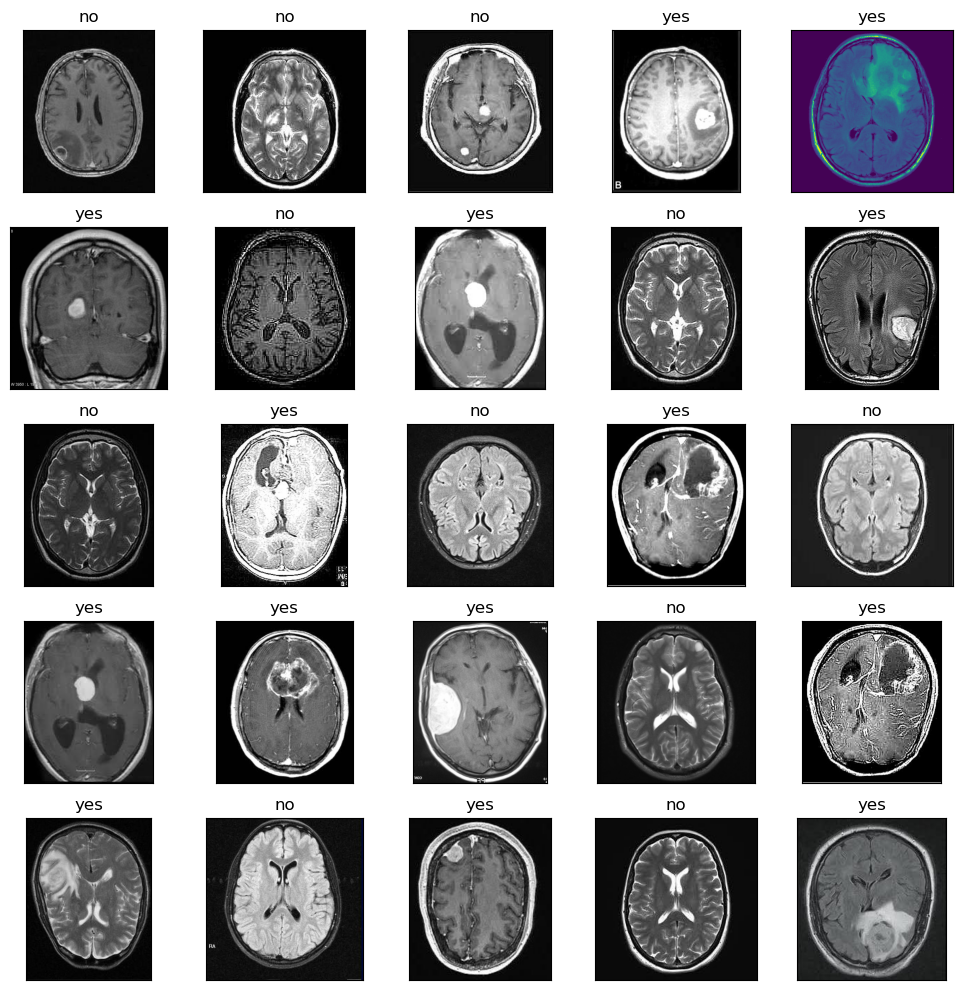

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()


 # MODEL TRAINING DATA

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [ ]:
print(train_data.shape)

(2250, 2)


In [ ]:
print(train_data.head())

                JPG TUMOR_CATEGORY
1102  no\no1068.jpg             no
1463   no\no416.jpg             no
1876  yes\y1487.jpg            yes
1225   yes\y979.jpg            yes
324    yes\y954.jpg            yes


In [ ]:
print(test_data.shape)

(250, 2)


In [ ]:
print(test_data.head())

                JPG TUMOR_CATEGORY
1447    yes\y70.jpg            yes
1114  yes\y1167.jpg            yes
1064  yes\y1365.jpg            yes
2287  yes\y1215.jpg            yes
1537  no\no1312.jpg             no


# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

In [ ]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [ ]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2025 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 225 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 250 validated image filenames belonging to 2 classes.


# CHECKING

In [ ]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 0, 1]
(200, 200, 1)


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 1, 1]
(200, 200, 1)


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 1, 0]
(200, 200, 1)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Use "learning_rate" instead of "lr"
Model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=50,steps_per_epoch=120)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 65s 527ms/step - accuracy: 0.6352 - loss: 0.9095 - val_accuracy: 0.8089 - val_loss: 0.5033
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 531ms/step - accuracy: 0.8115 - loss: 0.4366 - val_accuracy: 0.8667 - val_loss: 0.3691
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 62s 512ms/step - accuracy: 0.8517 - loss: 0.3454 - val_accuracy: 0.8533 - val_loss: 0.3224
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 503ms/step - accuracy: 0.8782 - loss: 0.2846 - val_accuracy: 0.9200 - val_loss: 0.2466
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 59s 490ms/step - accuracy: 0.9042 - loss: 0.2276 - val_accuracy: 0.9022 - val_loss: 0.2365
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.9316 - loss: 0.1738 - val_accuracy: 0.9333 - val_loss: 0.1887
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 475ms/step - accuracy: 0.9549 - loss: 0.1246 - val_accuracy: 0.9467 - val_loss: 0.1975
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 54s 448ms/step - accuracy: 0.9557 - loss: 0

In [ ]:
print(Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,994,182 (102.97 MB)

 Trainable params: 13,497,090 (51.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,497,092 (51.49 MB)

None


In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

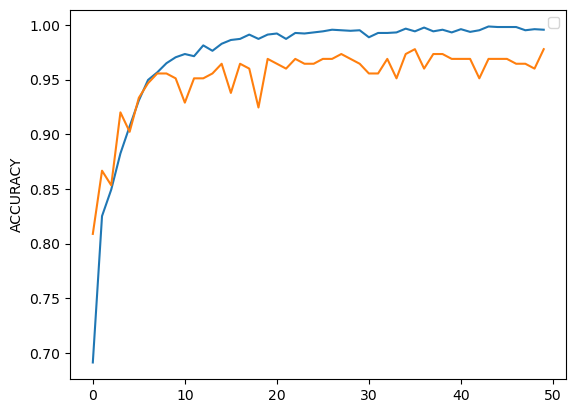

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

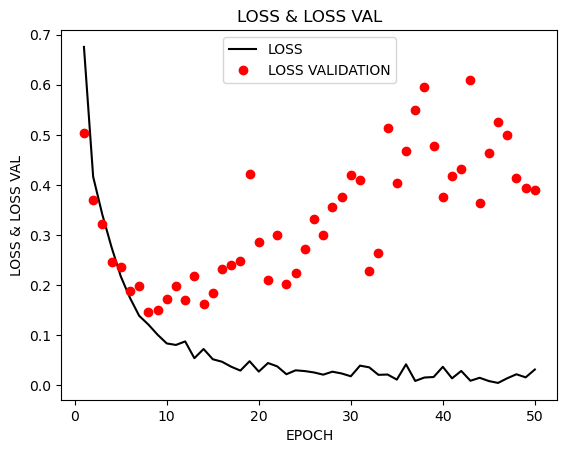

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

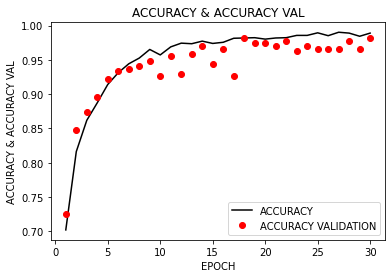

In [ ]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

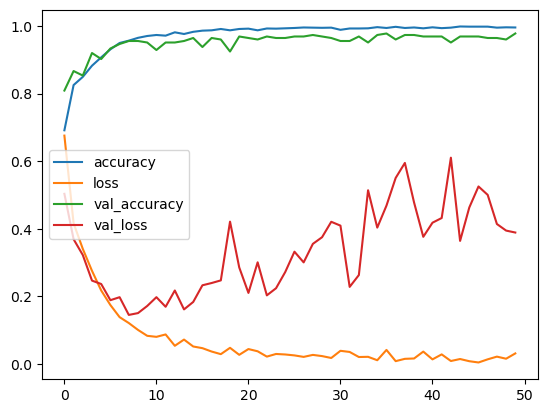

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.6731
ACCURACY:  0.97


In [ ]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [ ]:
print(Main_Data_Prediction.head())

               JPG
0   pred\pred0.jpg
1   pred\pred1.jpg
2  pred\pred10.jpg
3  pred\pred11.jpg
4  pred\pred12.jpg


In [ ]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


In [ ]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction)

[1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR']


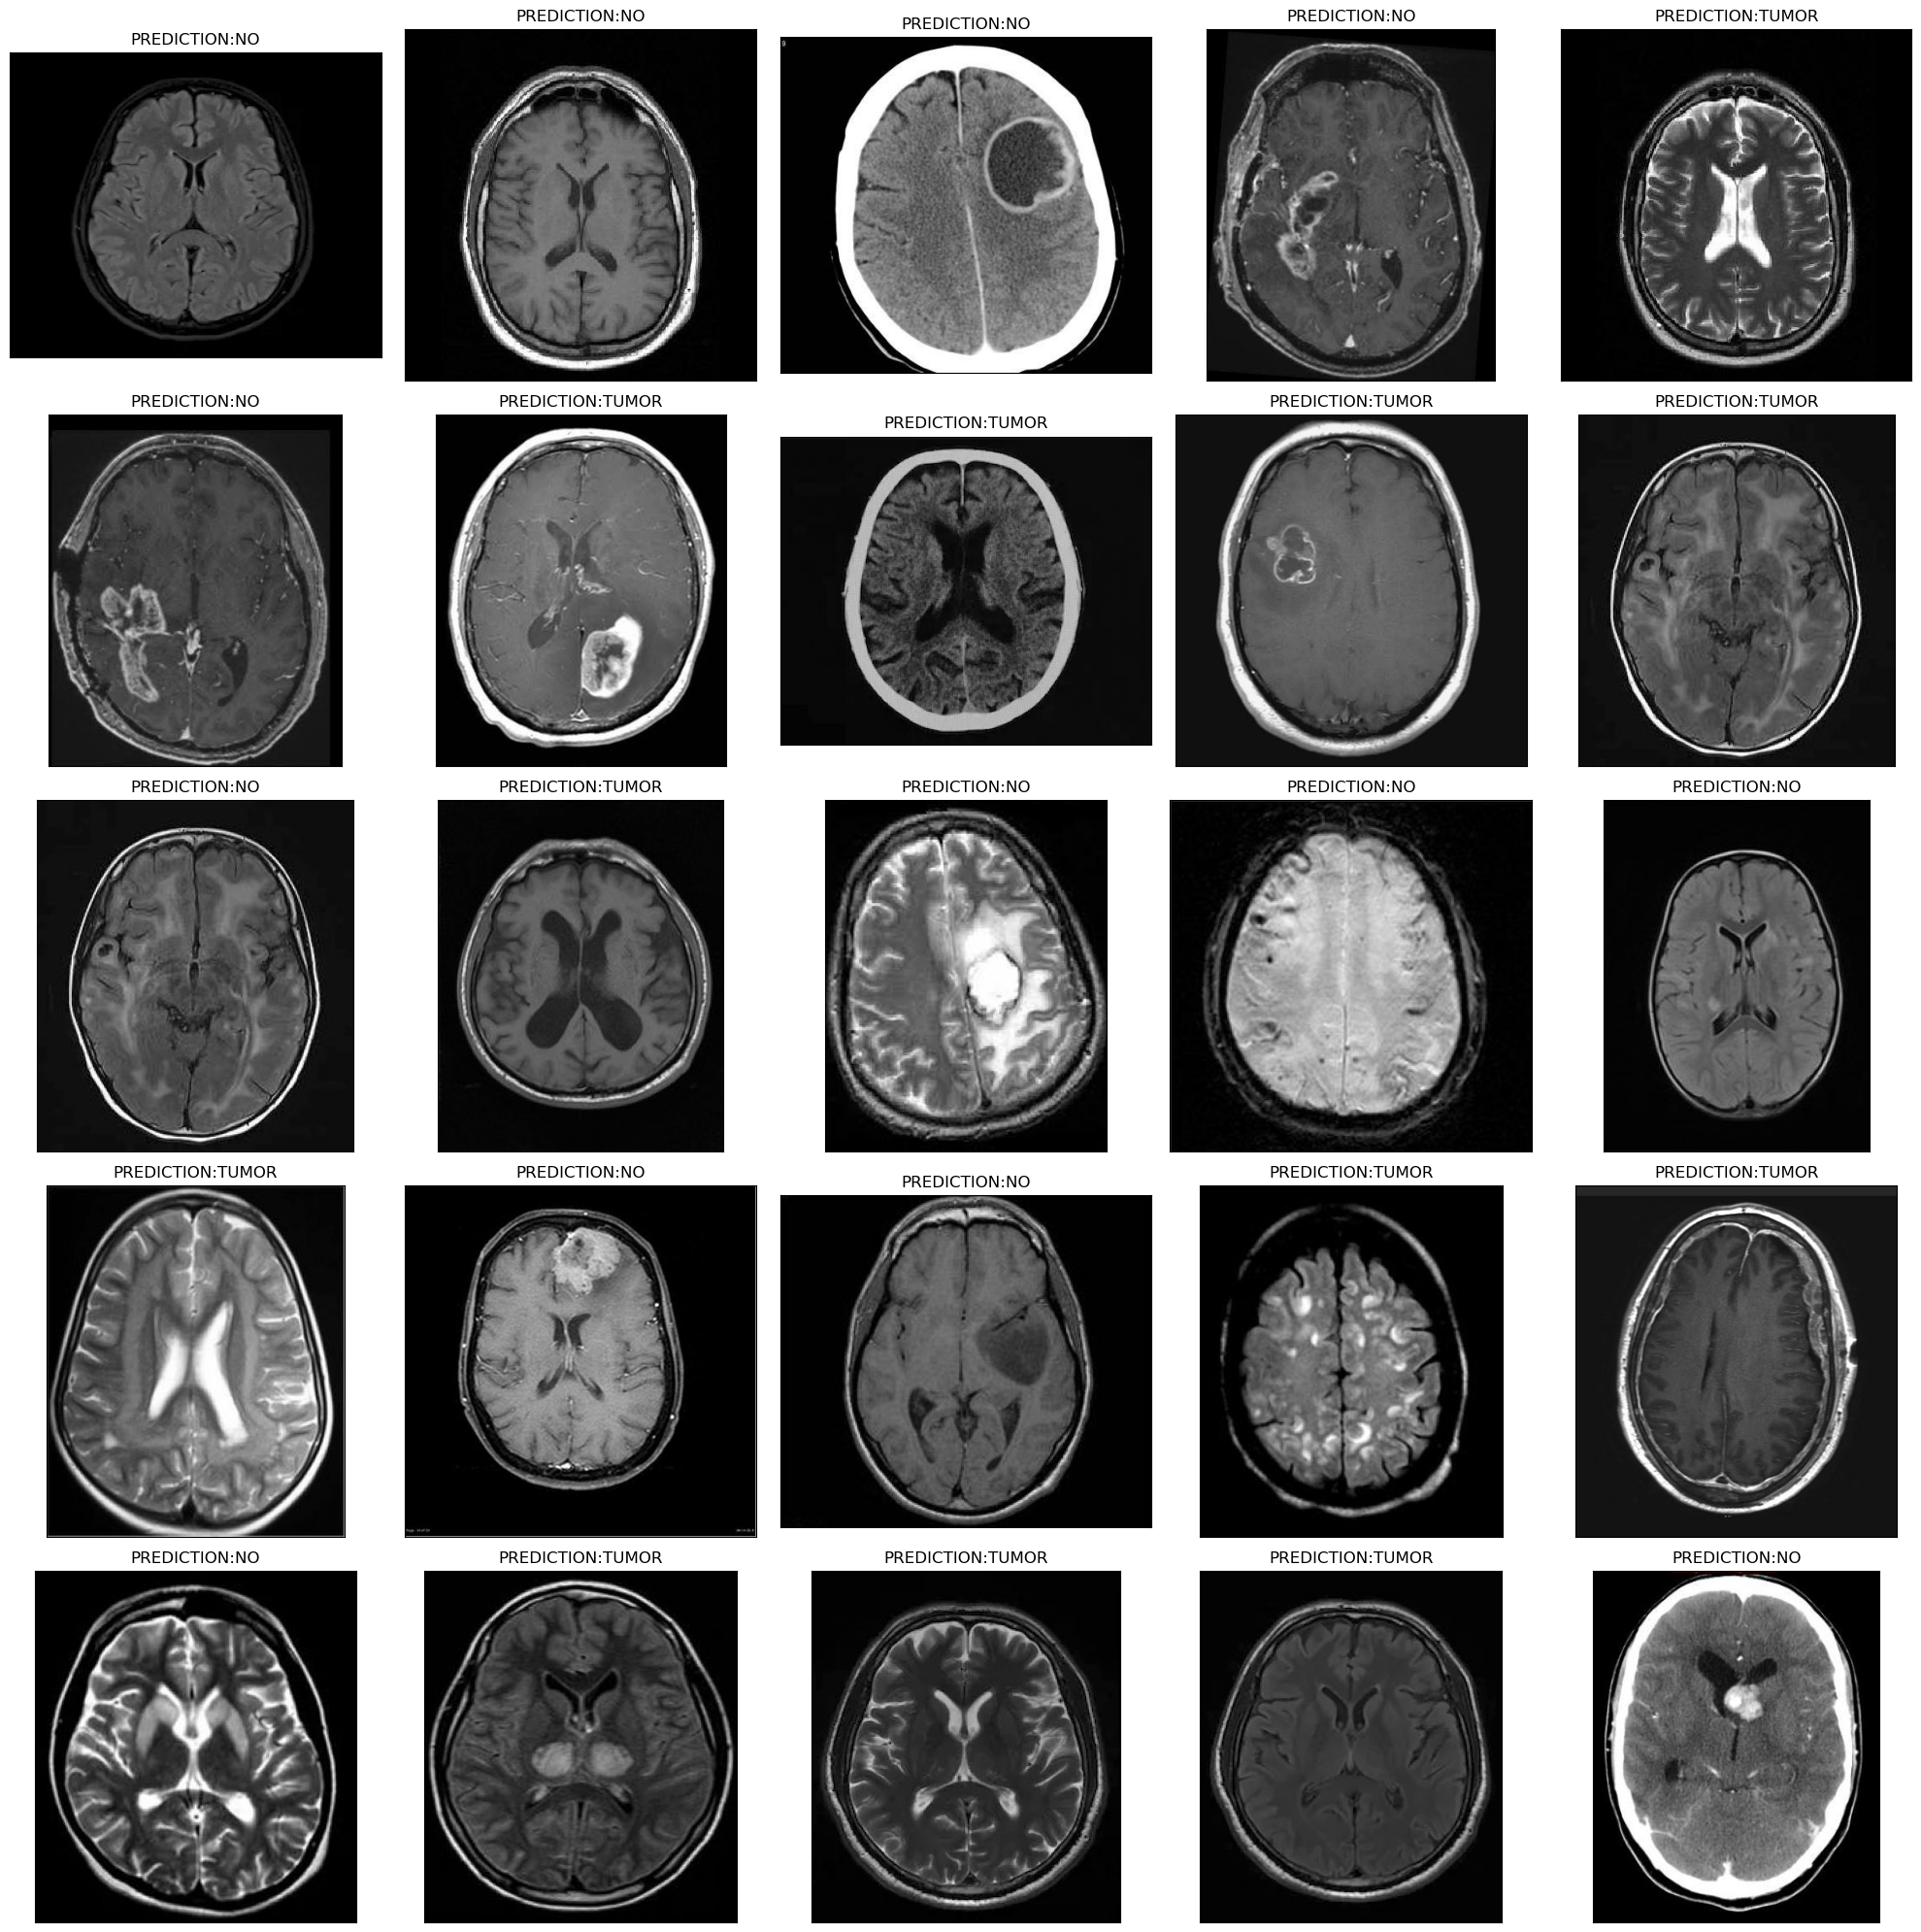

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [ ]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [ ]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2025 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 225 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

Model_Two.compile(optimizer=RMSprop(learning_rate=0.001),  # Use learning_rate instead of lr
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])


# Model fitting

In [ ]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 375ms/step - accuracy: 0.5802 - loss: 0.6891 - val_accuracy: 0.5733 - val_loss: 0.6796
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - accuracy: 0.6010 - loss: 0.6574 - val_accuracy: 0.5911 - val_loss: 0.6658
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.6835 - loss: 0.5987 - val_accuracy: 0.7422 - val_loss: 0.5631
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.7275 - loss: 0.5628 - val_accuracy: 0.7289 - val_loss: 0.5493
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 357ms/step - accuracy: 0.7479 - loss: 0.5493 - val_accuracy: 0.7600 - val_loss: 0.5337
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - accuracy: 0.7762 - loss: 0.5242 - val_accuracy: 0.8044 - val_loss: 0.4960
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.7747 - loss: 0.5082 - val_accuracy: 0.7956 - val_loss: 0.4740
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.7853 - loss: 0

In [ ]:
print(Model_Two.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,269,254 (20.10 MB)

 Trainable params: 2,634,626 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,634,628 (10.05 MB)

None


In [ ]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

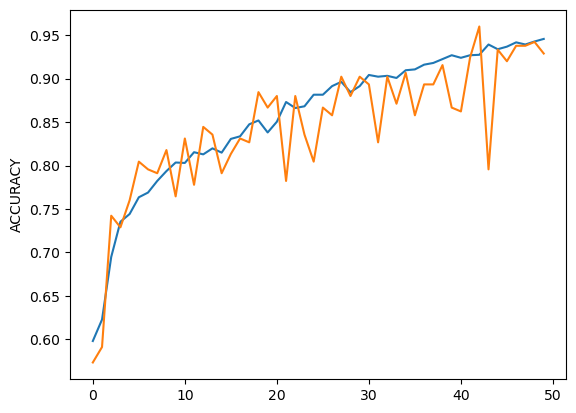

In [ ]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.show()

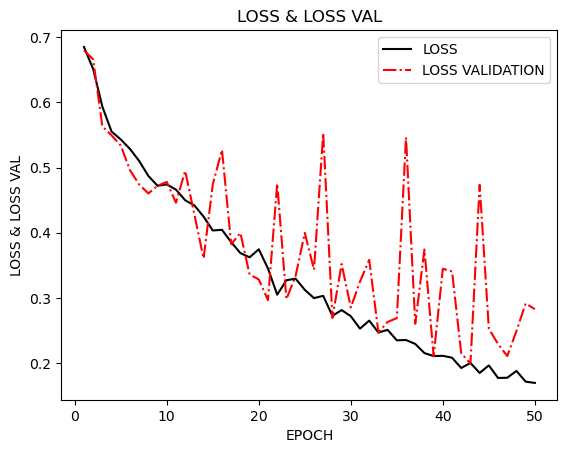

In [ ]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

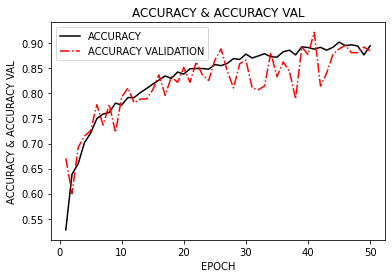

In [ ]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

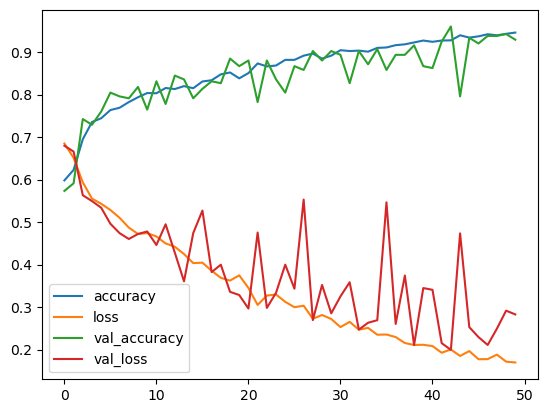

In [ ]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

In [ ]:
print(globals().keys())  # Lists all defined variables


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'sns', 'plt', 'filterwarnings', 'confusion_matrix', 'accuracy_score', 'classification_report', 'roc_auc_score', 'roc_curve', 'Sequential', 'Dense', 'Dropout', 'Flatten', 'Conv2D', 'MaxPool2D', 'BatchNormalization', 'MaxPooling2D', 'models', 'layers', 'tf', 'os', 'Path', 'cv2', 'ImageDataGenerator', 'to_categorical', 'train_test_split', 'regularizers', 'RMSprop', 'Adam', 'glob', 'Image', '_i2', 'No_Data_Path', 'Yes_Data_Path', '_i3', 'No_JPG_Path', 'Yes_JPG_Path', '_i4', '_i5', 'Yes_No_List', 'No_JPG', 'Yes_JPG', '_i6', '_i7', 'JPG_Labels', '_i8', '_i9', 'JPG_Path_Series', 'JPG_Category_Series', '_i10', 'Main_Train_Data', '_i11', '_i12', 'Prediction_Path', '_i13', 'Test_JPG_Path', '_i14', '_i15', 'Test_JPG_Labels', '_i16', '_i17', 'Test_JP

In [ ]:
type(ANN_Model_Two)


keras.src.callbacks.history.History

In [ ]:
print(type(Model_Two))


<class 'keras.src.models.sequential.Sequential'>


In [ ]:
Model_Two.save("brain_tumor_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Example: Assume you used LabelEncoder() for labels
label_encoder = LabelEncoder()
label_encoder.fit(["Tumor", "No Tumor"])  # Fit with your classes

# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

print("Label Encoder saved successfully!")


Label Encoder saved successfully!


In [ ]:
with open("label_encoder.pkl", "rb") as file:
    label_encoder = pickle.load(file)

print("Loaded Label Encoder:", label_encoder.classes_)


Loaded Label Encoder: ['No Tumor' 'Tumor']


In [ ]:
print("Label Encoder Classes:", label_encoder.classes_)


Label Encoder Classes: ['No Tumor' 'Tumor']


In [ ]:
print("Model Input Shape:", model.input_shape)


Model Input Shape: (None, 200, 200, 1)


In [ ]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("brain_tumor_model.h5")

# Print model summary to check the input shape
model.summary()

# Get the input shape of the first layer
input_shape = model.input_shape
print("Model Input Shape:", input_shape)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,634,628 (10.05 MB)

 Trainable params: 2,634,626 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model Input Shape: (None, 200, 200, 1)
